In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import pandas as pd


Import library
1. OpenCV = digunakan untuk pengolahan citra dan visi komputer.
2. Matplotlib = digunakan untuk visualisasi data dalam Python.
3. NumPy = digunakan untuk komputasi numerik.
4. Modul os = menyediakan fungsi-fungsi yang berinteraksi dengan sistem operasi.
5. Modul random = digunakan untuk menghasilkan bilangan acak.
6. Pandas = digunakan untuk analisis data struktural dalam Python.


## Data Preparation

### Data Augmentation

In [2]:
def resize_image(image, target_size=(150, 150)):
    return cv2.resize(image, target_size)

def rotate_image(image, angle):
    height, width = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    return rotated_image

def shift_image(image, shift_x, shift_y):
    height, width = image.shape[:2]
    translation_matrix = np.float32([[1, 0, shift_x], [0, 1, shift_y]])
    shifted_image = cv2.warpAffine(image, translation_matrix, (width, height))
    return shifted_image

def zoom_image(image, scale):
    height, width = image.shape[:2]
    center_x, center_y = width // 2, height // 2
    scaled_width, scaled_height = int(width * scale), int(height * scale)
    start_x, start_y = center_x - scaled_width // 2, center_y - scaled_height // 2
    end_x, end_y = start_x + scaled_width, start_y + scaled_height
    zoomed_image = image[start_y:end_y, start_x:end_x]
    return zoomed_image

def flip_horizontal(image):
    return cv2.flip(image, 1)

def flip_vertical(image):
    return cv2.flip(image, 0)

input_folder = "C:/Users/YURAKI/PCD/praktikum/modul-6-jurnal-Rifkyy29/finger/finger_2"

image_files = [f for f in os.listdir(input_folder) if os.path.isfile(os.path.join(input_folder, f))]

num_images = 3

augmented_images = []

for file in image_files:
    image_path = os.path.join(input_folder, file)
    original_image = cv2.imread(image_path)
    for i in range(num_images):
            augmented_image = original_image.copy()

            augment_type = random.randint(1, 100)

            if 1 <= augment_type <= 20:
                angle = random.randint(-10, 10)
                augmented_image = rotate_image(augmented_image, angle)

            elif 21 <= augment_type <= 40:
                shift_x = random.randint(-10, 10)
                shift_y = random.randint(-10, 10)
                augmented_image = shift_image(augmented_image, shift_x, shift_y)

            elif 41 <= augment_type <= 60:
                scale = random.uniform(0.9, 1.1)
                augmented_image = zoom_image(augmented_image, scale)

            elif 61 <= augment_type <= 75:
                augmented_image = flip_horizontal(augmented_image)

            elif 76 <= augment_type <= 90:
                augmented_image = flip_vertical(augmented_image)

            elif 91 <= augment_type <= 100:
                angle = random.randint(-10, 10)
                augmented_image = rotate_image(augmented_image, angle)

                shift_x = random.randint(-10, 10)
                shift_y = random.randint(-10, 10)
                augmented_image = shift_image(augmented_image, shift_x, shift_y)

                scale = random.uniform(0.9, 1.1)
                augmented_image = zoom_image(augmented_image, scale)

                if random.random() < 0.5:
                    augmented_image = flip_horizontal(augmented_image)

                if random.random() < 0.5:
                    augmented_image = flip_vertical(augmented_image)

            augmented_image = resize_image(augmented_image)
            augmented_images.append(augmented_image)

augmented_images_array = np.array(augmented_images)


kode di atas merupakan proses data augmentasi yang berguna untuk membuat data lebih banyak dan bervariasi. Adapun fungsi fungsi yang digunakan dalam melakukan augmentasi data:
1. `resize_image`: Mengubah ukuran gambar sesuai dengan ukuran target yang diberikan.
2. `rotate_image`: Memutar gambar sebesar sudut yang ditentukan.
3. `shift_image`: Memindahkan gambar secara horizontal dan vertikal sesuai dengan nilai pergeseran yang diberikan.
4. `zoom_image`: Memperbesar atau memperkecil gambar sesuai dengan faktor skala yang diberikan.
5. `flip_horizontal` dan `flip_vertical`: Membalikkan gambar secara horizontal atau vertikal.

langkah yang dilakukan untuk data augmentasi pertama mengiterasi melalui setiap file gambar dalam folder input.
Untuk setiap gambar, kemudian membuat berapa banyak gambar diaugmentasi `num_images` dengan transformasi acak yang dipilih.
Transformasi dipilih secara acak dengan menggunakan bilangan acak antara 1 dan 100 `augment_type`. Berbagai jenis augmentasi dipilih berdasarkan rentang nilai `augment_type`.
Setiap gambar augmented kemudian diubah ukurannya menjadi ukuran yang ditentukan (default: 150x150) menggunakan fungsi `resize_image`.
Gambar-gambar augmented disimpan dalam list `augmented_images`. Kemudian diubah menjadi array agar mudah di proses.

kode di bawah merupakan fungsi `show_images`digunakan untuk menampilkan gambar yang sudah di augmentasi. jumlah gambar yang ingin ditampilkan dapat diatur sesuai dengan `num_rows=10` dan `num_cols`

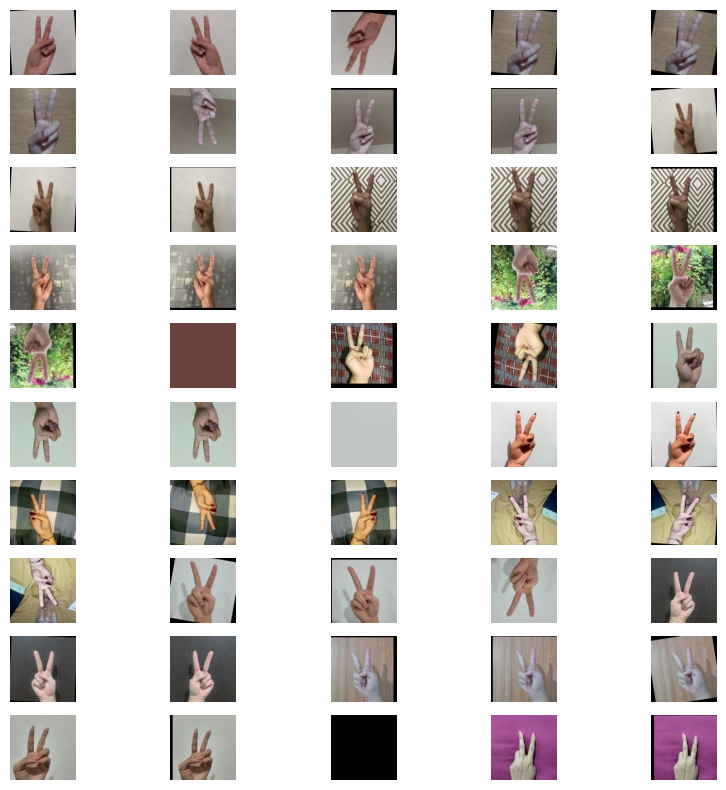

In [3]:
def show_images(images, num_rows=10, num_cols=5):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10,10))
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i, j].imshow(cv2.cvtColor(images[i * num_cols + j], cv2.COLOR_BGR2RGB))
            axes[i, j].axis('off')
    plt.show()

show_images(augmented_images)

### Preprocessing

kode di bawah melakukan proses preprcessing. Pertama dengan menggunakan library cv2 untuk melakukan denoise dan proses dilasi dengan cara menerapkan modul GaussianBlur untuk denoise dan dilate untuk dilasi. Kemudian membuat list gambar yang sudah di proses dengan nama `processed_images`, melakukan perulangan pda gambar yang sudah di augmentasi `augmented_images_array` untuk melakukan denoise dan dilasi pada semua gambar kemudian di masukkan ke dalam list `processed_images`. Kemudian menampilkan gambar yang sudah di proses dengan fungsi `show_images`

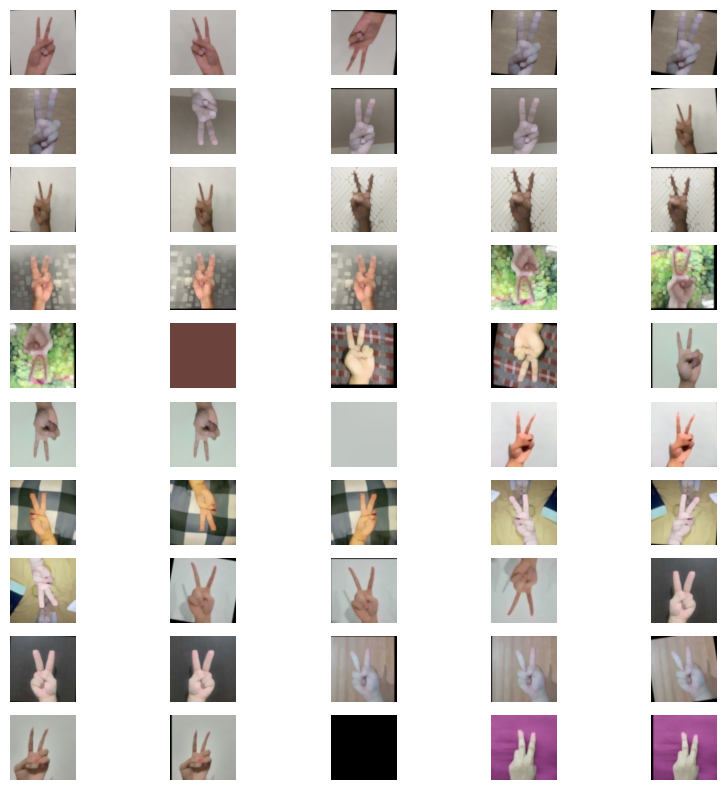

In [4]:
def denoise_image(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

def dilate_image(image, kernel_size=(5, 5), iterations=1):
    kernel = np.ones(kernel_size, np.uint8)
    dilated_image = cv2.dilate(image, kernel, iterations=iterations)
    return dilated_image

processed_images = []

for image in augmented_images_array:
    denoised_image = denoise_image(image)
    dilated_image = dilate_image(denoised_image)
    
    processed_images.append(dilated_image)

processed_images_array = np.array(processed_images)


show_images(processed_images)


### Feature Extraction

In [5]:
def calculate_glcm(image, distances, angles):
    max_gray_level = 256
    glcm = np.zeros((max_gray_level, max_gray_level, len(distances), len(angles)), dtype=np.float64)
    
    for distance_index, distance in enumerate(distances):
        for angle_index, angle in enumerate(angles):
            for i in range(image.shape[0]):
                for j in range(image.shape[1]):
                    row_offset = int(np.round(np.sin(angle) * distance))
                    col_offset = int(np.round(np.cos(angle) * distance))
                    row = i + row_offset
                    col = j + col_offset
                    if row >= 0 and row < image.shape[0] and col >= 0 and col < image.shape[1]:
                        current_pixel = image[i, j]
                        neighbor_pixel = image[row, col]
                        glcm[current_pixel, neighbor_pixel, distance_index, angle_index] += 1
    
    glcm_sum = glcm.sum(axis=(0, 1), keepdims=True)
    glcm = glcm / glcm_sum
    return glcm

def calculate_glcm_properties(glcm):
    num_levels = glcm.shape[0]
    num_distances = glcm.shape[2]
    num_angles = glcm.shape[3]
    
    contrast = np.zeros((num_distances, num_angles))
    dissimilarity = np.zeros((num_distances, num_angles))
    homogeneity = np.zeros((num_distances, num_angles))
    energy = np.zeros((num_distances, num_angles))
    correlation = np.zeros((num_distances, num_angles))
    asm = np.zeros((num_distances, num_angles))
    entropy = np.zeros((num_distances, num_angles))
    
    for d in range(num_distances):
        for a in range(num_angles):
            glcm_slice = glcm[:, :, d, a]
            i, j = np.indices(glcm_slice.shape)
            
            contrast[d, a] = np.sum((i - j) ** 2 * glcm_slice)
            dissimilarity[d, a] = np.sum(np.abs(i - j) * glcm_slice)
            homogeneity[d, a] = np.sum(glcm_slice / (1 + np.abs(i - j)))
            energy[d, a] = np.sum(glcm_slice ** 2)
            asm[d, a] = energy[d, a]
            
            mean_i = np.sum(i * glcm_slice)
            mean_j = np.sum(j * glcm_slice)
            std_i = np.sqrt(np.sum((i - mean_i) ** 2 * glcm_slice))
            std_j = np.sqrt(np.sum((j - mean_j) ** 2 * glcm_slice))
            
            if std_i > 0 and std_j > 0:
                correlation[d, a] = np.sum((i - mean_i) * (j - mean_j) * glcm_slice) / (std_i * std_j)
            else:
                correlation[d, a] = 0
                
            entropy[d, a] = -np.sum(glcm_slice * np.log2(glcm_slice + (glcm_slice == 0)))
    
    return contrast, dissimilarity, homogeneity, energy, correlation, asm, entropy

features = []

angles = [0, 45, 90, 135]
distances = [1]

for idx, image in enumerate(processed_images):
    glcm = calculate_glcm(image, distances, angles)

    contrast, dissimilarity, homogeneity, energy, correlation, asm, entropy = calculate_glcm_properties(glcm)
    
    feature = {'image_index': idx}
    for angle_index, angle in enumerate([0, 45, 90, 135]):
        feature[f'contrast_{angle}'] = contrast[0, angle_index]
        feature[f'dissimilarity_{angle}'] = dissimilarity[0, angle_index]
        feature[f'homogeneity_{angle}'] = homogeneity[0, angle_index]
        feature[f'energy_{angle}'] = energy[0, angle_index]
        feature[f'correlation_{angle}'] = correlation[0, angle_index]
        feature[f'asm_{angle}'] = asm[0, angle_index]
        feature[f'entropy_{angle}'] = entropy[0, angle_index]
    
    features.append(feature)

features_df = pd.DataFrame(features)

output_csv_path = "csv_finger2/glcm_finger_2.csv"
features_df.to_csv(output_csv_path, index=False)

print(f"Fitur GLCM selesai diekstraksi")


Fitur GLCM selesai diekstraksi


Kode di atas melakukan ekstraksi fitur GLCM (Gray-Level Co-occurrence Matrix) dari gambar-gambar yang telah diproses sebelumnya.

1. Fungsi `calculate_glcm`:
Fungsi ini menghitung matriks GLCM dari sebuah gambar. Matriks GLCM dihitung untuk setiap jarak `distance` dan sudut `angle` yang ditentukan. Untuk setiap piksel dalam gambar, diformulasikan jarak `row_offset` dan `col_offset` dan koordinat piksel tetangga yang sesuai. Piksel dan tetangga tersebut digunakan untuk mengupdate nilai GLCM. Hasil GLCM dinormalisasi dengan jumlah total entri dalam matriks.

2. Fungsi `calculate_glcm_properties`:
Fungsi ini menghitung berbagai properti statistik dari matriks GLCM yang dihasilkan. Properti yang dihitung meliputi kontras, disimilaritas, homogenitas, energi, korelasi, ASM (Angular Second Moment), dan entropi.
Setiap properti dihitung untuk setiap jarak dan sudut.

3. Loop untuk Ekstraksi Fitur:
Skrip ini melakukan loop melalui setiap gambar yang telah diproses sebelumnya. Untuk setiap gambar, matriks GLCM dihitung menggunakan fungsi calculate_glcm.
Properti GLCM diekstraksi menggunakan fungsi calculate_glcm_properties. Hasil fitur disimpan dalam sebuah list features.

4. Konversi ke DataFrame:
Hasil fitur disimpan dalam bentuk DataFrame menggunakan `pd.DataFrame`. DataFrame ini kemudian disimpan dalam format CSV. Dengan cara ini, skrip ini menghasilkan dataset fitur GLCM yang dapat digunakan untuk melatih model pembelajaran mesin dalam berbagai tugas analisis citra atau pengenalan pola.

### Features Selection

In [6]:
features_df = pd.read_csv("csv_finger2/glcm_finger_2.csv")

variance_threshold = 0.29
correlation_threshold = 0.8

variances = features_df.var()
selected_features_variance = variances[variances > variance_threshold].index
features_df_variance = features_df[selected_features_variance]

corr_matrix = features_df_variance.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]
features_df_correlation = features_df_variance.drop(columns=to_drop)

output_csv_path_selected = "csv_finger2/glcm_features_selected_finger_2l.csv"
features_df_correlation.to_csv(output_csv_path_selected, index=False)


Kode di atas memuat DataFrame yang berisi fitur GLCM dari file CSV yang sebelumnya telah disimpan, kemudian melakukan seleksi fitur berdasarkan ambang batas varians dan ambang batas korelasi.

1. Seleksi Fitur Berdasarkan Varians:
Varians dari setiap fitur dihitung menggunakan features_df.var(). Fitur yang memiliki varians di atas ambang batas (variance_threshold) dipilih. DataFrame baru features_df_variance dibuat hanya dengan fitur-fitur yang dipilih.

2. Seleksi Fitur Berdasarkan Korelasi:
Matriks korelasi absolut dihitung menggunakan features_df_variance.corr().abs(). Bagian atas matriks korelasi diambil menggunakan np.triu(np.ones(corr_matrix.shape), k=1), karena matriks korelasi adalah simetris. Fitur-fitur yang memiliki korelasi di atas ambang batas (correlation_threshold) dengan fitur lainnya diidentifikasi dan dihapus. DataFrame baru features_df_correlation dibuat hanya dengan fitur-fitur yang dipilih setelah seleksi korelasi. 

Terakhir menyimpan DataFrame yang Dipilih. Dengan melakukan dua tahap seleksi fitur yang memungkinkan untuk mengurangi dimensi dari dataset fitur GLCM dan menghilangkan fitur-fitur yang memiliki korelasi tinggi dengan fitur lainnya.

### Splitting Data

In [7]:
features_df = pd.read_csv("csv_finger2/glcm_features_selected_finger_2l.csv")

features = features_df.drop(columns=['image_index'])
labels = features_df['image_index']

data_combined = features.copy()
data_combined['label'] = labels

data_combined = data_combined.sample(frac=1, random_state=42).reset_index(drop=True)

train_ratio = 0.8
train_size = int(len(data_combined) * train_ratio)

train_data = data_combined[:train_size]
test_data = data_combined[train_size:]

X_train = train_data.drop(columns=['label'])
y_train = train_data['label']
X_test = test_data.drop(columns=['label'])
y_test = test_data['label']

X_train.to_csv("csv_finger2/X_train_2.csv", index=False)
X_test.to_csv("csv_finger2/X_test_2.csv", index=False)
y_train.to_csv("csv_finger2/y_train_2.csv", index=False)
y_test.to_csv("csv_finger2/y_test_2.csv", index=False)

print("Data telah selesai dibagi")


Data telah selesai dibagi


Pada kode di atas merupakan kode yang berfokus pada pemisahan data menjadi data latih dan data uji untuk keperluan pelatihan dan evaluasi model.

1. Memuat Data dari File CSV:
DataFrame features_df dimuat dari file CSV yang berisi fitur GLCM yang telah dipilih sebelumnya.

2. Pemisahan Fitur dan Label:
Fitur-fitur (kolom-kolom kecuali 'image_index') dan label (kolom 'image_index') dipisahkan ke dalam dua DataFrame terpisah. DataFrame features berisi fitur-fitur, sementara labels berisi label gambar (indeks gambar).

3. Penggabungan Data dan Pengacakan:
Fitur-fitur dan label-label digabungkan menjadi satu DataFrame dengan menambahkan kolom 'label' yang berisi label-label.
Data diacak dengan menggunakan metode .sample(frac=1) untuk memastikan bahwa data teracak dengan baik. Pengacakan dilakukan dengan menggunakan random_state=42 untuk menghasilkan hasilnya.

4. Pemisahan Data Latih dan Data Uji:
Ukuran data latih ditentukan berdasarkan rasio yang telah ditetapkan sebelumnya (train_ratio), dan data uji akan menjadi sisa data setelah data latih diambil. DataFrame dipecah menjadi train_data dan test_data berdasarkan ukuran data latih yang telah ditentukan sebelumnya.

5. Pemisahan Fitur dan Label untuk Data Latih dan Data Uji:
DataFrame-dataFrame yang telah dipisahkan (train_data dan test_data) kemudian dibagi lagi menjadi fitur (X) dan label (y) untuk data latih dan data uji. Dan yang terakhir menyimpan Data sebagai File CSV

Dengan langkah-langkah yang sudah dilakukan, data telah disiapkan untuk digunakan dalam pelatihan dan evaluasi model.

### Normalization

In [8]:
X_train = pd.read_csv("csv_finger2/X_train_2.csv")
X_test = pd.read_csv("csv_finger2/X_test_2.csv")
y_train = pd.read_csv("csv_finger2/y_train_2.csv")
y_test = pd.read_csv("csv_finger2/y_test_2.csv")


def min_max_scaling(df):
    return (df - df.min()) / (df.max() - df.min())

X_train_normalized = min_max_scaling(X_train)
X_test_normalized = min_max_scaling(X_test)
y_train_normalized = min_max_scaling(y_train)
y_test_normalized = min_max_scaling(y_test)

X_train_normalized.to_csv("csv_finger2/X_train_normalized_2.csv", index=False)
X_test_normalized.to_csv("csv_finger2/X_test_normalized_2.csv", index=False)
y_train_normalized.to_csv("csv_finger2/y_train_normalized_2.csv", index=False)
y_test_normalized.to_csv("csv_finger2/y_test_normalized_2.csv", index=False)

print("Data telah selesai dinormalisasi")

Data telah selesai dinormalisasi


Dalam bagian ini, kode melakukan normalisasi data menggunakan metode Min-Max Scaling sebelum menyimpannya kembali ke file CSV.
1. Memuat Data dari File CSV:
DataFrame X_train, X_test, y_train, dan y_test dimuat dari file CSV yang sesuai.

2. Fungsi Min-Max Scaling:
Fungsi `min_max_scaling` didefinisikan untuk melakukan normalisasi Min-Max Scaling pada DataFrame yang diberikan. Normalisasi Min-Max Scaling dilakukan dengan mengurangi nilai minimum dari setiap kolom dan membagi hasilnya dengan selisih nilai maksimum dan minimum dari setiap kolom. Ini akan menghasilkan nilai antara 0 dan 1.

3. Normalisasi Data:
Setiap DataFrame di-normalisasi menggunakan fungsi `min_max_scaling`. X_train, X_test, y_train, dan y_test dinormalisasi masing-masing.

Terakhir menyimpan Data yang Dinormalisasi sebagai File CSV. Dengan normalisasi ini, setiap fitur dan label telah diubah sehingga nilainya berada dalam rentang yang seragam, memudahkan proses pelatihan model dan mencegah dominasi fitur-fitur dengan skala yang besar.

## Modeling

## Evaluation

In [10]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

def classification_report(y_true, y_pred):
    labels = np.unique(y_true)
    report = {}
    for label in labels:
        true_positive = np.sum((y_true == label) & (y_pred == label))
        false_positive = np.sum((y_true != label) & (y_pred == label))
        false_negative = np.sum((y_true == label) & (y_pred != label))
        true_negative = np.sum((y_true != label) & (y_pred != label))
        
        precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
        recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        
        support = np.sum(y_true == label)
        
        report[label] = {
            "precision": precision,
            "recall": recall,
            "f1_score": f1_score,
            "support": support
        }
    
    avg_precision = np.sum([report[label]['precision'] * report[label]['support'] for label in labels]) / len(y_true)
    avg_recall = np.sum([report[label]['recall'] * report[label]['support'] for label in labels]) / len(y_true)
    avg_f1_score = np.sum([report[label]['f1_score'] * report[label]['support'] for label in labels]) / len(y_true)
    
    report['weighted avg'] = {
        "precision": avg_precision,
        "recall": avg_recall,
        "f1_score": avg_f1_score,
        "support": len(y_true)
    }
    
    return report

acc = accuracy(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Akurasi: {acc}")
print("Classification Report:")
for label, metrics in report.items():
    print(f"Label {label}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.2f}")

print("Evaluasi selesai.")


Akurasi: 0.0
Classification Report:
Label 0.0:
  precision: 0.00
  recall: 0.00
  f1_score: 0.00
  support: 1.00
Label 0.0054517133956386:
  precision: 0.00
  recall: 0.00
  f1_score: 0.00
  support: 1.00
Label 0.0093457943925233:
  precision: 0.00
  recall: 0.00
  f1_score: 0.00
  support: 1.00
Label 0.0101246105919003:
  precision: 0.00
  recall: 0.00
  f1_score: 0.00
  support: 1.00
Label 0.0116822429906542:
  precision: 0.00
  recall: 0.00
  f1_score: 0.00
  support: 1.00
Label 0.0147975077881619:
  precision: 0.00
  recall: 0.00
  f1_score: 0.00
  support: 1.00
Label 0.0155763239875389:
  precision: 0.00
  recall: 0.00
  f1_score: 0.00
  support: 1.00
Label 0.0194704049844236:
  precision: 0.00
  recall: 0.00
  f1_score: 0.00
  support: 1.00
Label 0.0257009345794392:
  precision: 0.00
  recall: 0.00
  f1_score: 0.00
  support: 1.00
Label 0.02803738317757:
  precision: 0.00
  recall: 0.00
  f1_score: 0.00
  support: 1.00
Label 0.0303738317757009:
  precision: 0.00
  recall: 0.00
  